<a href="https://colab.research.google.com/github/AMRowe99/ES_Class/blob/main/Forest_carbon_balance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt

#%precision 1
# See for documentation and help
# https://docs.sympy.org/latest/guides/solving/solve-ode.html

'%.1f'

# Forest Carbon Stock
We are given a function that specifies the carbon in an area of biomass of a given age.

Carbon Content: $C(t) =\tau S \left(1-exp(\frac{t}{\tau}) \right)^{m}$ [tC/ha]

If we sustainably manage a forest of a given total area by harvesting a fraction of the area and immediately replanting, we create steady-state forest with a net annual removal of carbon from the atmosphere.

If we modify our harvest process so that we are continually harvesting and replanting at a rate that results in the same fraction of area being harvested each year, then the mass of carbon in the forest would have a continuous age distribution. We would integrate the carbon content equation of the age distribution to determine the stock of carbon and the net removal rate.

## Continuous Harvest

The carbon stored in biomass is determined by integrating the biomass content per unit area over the total area of forest, $A_{F}$,

\begin{equation}
C_{Forest} [tC]= \int_{0}^{A_{F}}C(A)dA
\end{equation}

where the age of forest is related to the area by,

\begin{equation}
t_{age}=t_{oldest} \frac{A}{A_{F}} →A=A_{F}\frac{t_{age}}{t_{oldest}}
\end{equation}

so,

\begin{equation}
C_{Forest} [tC]= \int_{0}^{t_{oldest}}C(t)\frac{A_{F}}{t_{oldest}}dt
\end{equation}

In [10]:
age, R, S, m, Af, tf= smp.symbols('t, R, S, m, A_{F}, t_{f}', real=True, positive=True)
c_For= smp.symbols('C_{For}', real=True, positive=True)
c_For=smp.Function(c_For)(age)  # Define the carbon in the forest as a function of age

# create an expression for carbon content as a function of the above parameters
c_For=R*S*(1-smp.exp(-age/R))**3  # tC/ha

# integrate over the age of the forest, t
# make sure to convert dA to dt
carbon=smp.integrate(c_For*Af/tf, (age, 0, tf))

# replace constants
cforest=carbon.subs({R: 30, S: 4, m :3})

cforest

120*A_{F} - 6600*A_{F}/t_{f} + (7200*A_{F}*t_{f}**2*exp(-t_{f}/10) - 32400*A_{F}*t_{f}**2*exp(-t_{f}/15) + 64800*A_{F}*t_{f}**2*exp(-t_{f}/30))/(6*t_{f}**3)

In [ ]:
# Convert the symbolic solution to a numeric function for solving using lambdify
Cforest_f=smp.lambdify([Af,tf], cforest) # create a numeric function from the symbolic expression

# Set the forest parameters (size and rotation period)
managed_area=20 # total are of managed forest [Mha]
period=100      # harvest cycle period [years]

# evaluate the numeric function with specified Af and toldest.
biomass_carbon=Cforest_f(managed_area,period)

print(f"The carbon stored in a forest of {managed_area:1.1f} Mha and cycle period {period} years is {biomass_carbon:4.1f} MtC.")

The carbon stored in a forest of 20.0 Mha and cycle period 100 years is 1155.7 MtC.


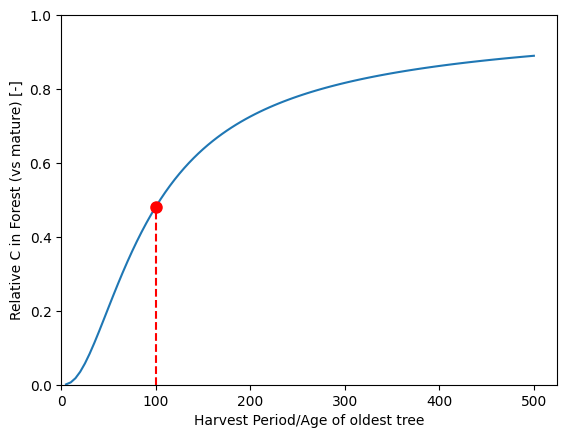

In [ ]:
# plot carbon content as a function of harvest period

# create an array of rotation periods
harvest_period=np.linspace(5,500,100)
mature_carbon=30*4
max_carbon=managed_area*mature_carbon

plt.plot(harvest_period,Cforest_f(20,harvest_period)/max_carbon)
ax=plt.gca()
ax.set_ylim([0, 1])
ax.set_xlim([0,None])
plt.ylabel('Relative C in Forest (vs mature) [-]')
plt.xlabel('Harvest Period/Age of oldest tree')
plt.plot(period, biomass_carbon/max_carbon, marker='o', markersize=8, color="red")
plt.vlines(period,0,biomass_carbon/max_carbon, colors='red', linestyles='dashed', label='Period')
plt.show()

# Note: a more realistic carbon potential would caputre a natural distribution of effective ages for subplots